In [352]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# latex font
import matplotlib
matplotlib.use('Agg')
matplotlib.rc('font', family='serif', serif='cm')
matplotlib.rc('text', usetex=True)
matplotlib.rc('ps', usedistiller='xpdf')
%matplotlib inline

In [353]:
cpg_cat = '/Users/jakesummers7200/JWST/PEARLS/PSFAGN-morphology/neptdf/cats/CPG_JWST_MAG_cat.txt'
cpg_table = Table.read(cpg_cat, format='ascii')

In [354]:
# retrieve my catalog for each spoke
spokes = ['spoke1a', 'spoke1b', 'spoke1ab', 'spoke2', 'spoke3', 'spoke4']
cat_dict = {}
for spoke in spokes:
    spoke_cat = f'/Users/jakesummers7200/JWST/PEARLS/PSFAGN-morphology/neptdf/cats/{spoke}/nep-{spoke}_total_cat_extinction.txt'
    spoke_table = Table.read(spoke_cat, format='ascii')
    cat_dict[spoke] = spoke_table

In [355]:
paper_ids = {3: 1, 105: 2, 289: 3, 1620: 4, 1918: 5, 5143: 6, 5334: 7, 5991: 8, 6062: 9, 6084: 10, 6203: 11, 6271: 12, 6582: 13, 7900: 14, 7910: 15, 8064: 16, 8367: 17, 9253: 18, 9280: 19, 9634: 20, 10230: 21, 10696: 22, 11198: 23, 11875: 24, 12752: 25, 14462: 26, 14545: 27, 14657: 28, 15174: 29, 17650: 30, 17916: 31, 18011: 32, 18042: 33, 19480: 34, 20127: 35, 20308: 36, 20613: 37, 20940: 38, 22371: 39, 22440: 40, 22978: 41, 23204: 42, 24344: 43, 24698: 44, 25066: 45, 25603: 46, 26046: 47, 26215: 48, 27600: 49, 28493: 50, 30550: 51, 31620: 52, 32403: 53, 34180: 54, 34370: 55, 34604: 56, 35999: 57, 36425: 58, 36433: 59, 36457: 60, 36630: 61, 36778: 62, 36975: 63, 37192: 64, 38125: 65, 38917: 66}

In [361]:
object_list = []
cpg_new = cpg_table.copy() 
# match all objects
for n, obj in enumerate(cpg_table):
    # tolerance and make sure there are not multiple matches for the object
    tol = 0.0002
    matches = 0
    
    # get ra and dec of the object
    ra = obj['RA']
    dec = obj['DEC']
    id = obj['id']

    # account for projection effects
    proj = abs(np.cos(dec*2*np.pi/360))

    # loop through spokes
    for spoke in spokes:
        cat = cat_dict[spoke]
        cat_ra = cat['RA']
        cat_dec = cat['DEC']
        
        idx = np.where((np.absolute(cat_ra - ra) < tol/proj) & (np.absolute(cat_dec - dec) < tol))

        if id == 18042 and spoke == 'spoke4':
            idx = np.array([[1997-1]])
        
        if len(idx[0]) == 1:
            cpg_new[n]['id'] = cat[idx]['id']
            cpg_new[n]['RA'] = cat[idx]['RA']
            cpg_new[n]['DEC'] = cat[idx]['DEC']
            cpg_new[n]['F444W']     = cat[idx]['F444W']
            cpg_new[n]['F444W_err'] = cat[idx]['F444W_err']
            cpg_new[n]['F410M']     = cat[idx]['F410M']
            cpg_new[n]['F410M_err'] = cat[idx]['F410M_err']
            cpg_new[n]['F356W']     = cat[idx]['F356W']
            cpg_new[n]['F356W_err'] = cat[idx]['F356W_err']
            cpg_new[n]['F277W']     = cat[idx]['F277W']
            cpg_new[n]['F277W_err'] = cat[idx]['F277W_err']
            cpg_new[n]['F200W']     = cat[idx]['F200W']
            cpg_new[n]['F200W_err'] = cat[idx]['F200W_err']
            cpg_new[n]['F150W']     = cat[idx]['F150W']
            cpg_new[n]['F150W_err'] = cat[idx]['F150W_err']
            cpg_new[n]['F115W']     = cat[idx]['F115W']
            cpg_new[n]['F115W_err'] = cat[idx]['F115W_err']
            cpg_new[n]['F090W']     = cat[idx]['F090W']
            cpg_new[n]['F090W_err'] = cat[idx]['F090W_err']

            my_id = int(cat[idx]['id'][0])
            num = my_id
            object_list.append((spoke, num, paper_ids[id]))
            matches += 1
        elif len(idx[0]) > 1:
            print(len(idx[0]), 'multiple matches')

    if matches == 0:
        print('no matches found', id)
    if matches > 1:
        print('multiple matches found', id)


/var/folders/02/0r851hhj6xxcvp48_3vzfpg80000gn/T/ipykernel_23311/1759691988.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_id = int(cat[idx]['id'][0])


In [ ]:
# id 18042 not matched, but just manually found it on the spoke 4 image to be id 1997
# probably just eliminated because it has another galaxy right next to it

In [362]:
# to get rid of glitchy table object
object_list2 = []
for obj in object_list:
    object_list2.append((obj[0], int(obj[1]), obj[2]))

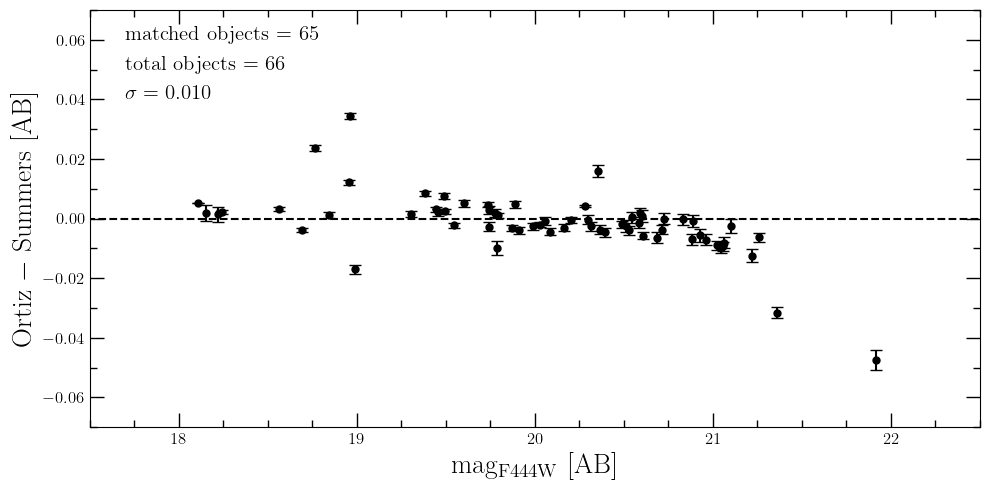

In [406]:
fig, ax = plt.subplots(1,1)    
fig.set_size_inches(10,5)

filt = 'F444W'
tol = 0.07

diff = cpg_table[filt] - cpg_new[filt]
diff = diff
err = np.sqrt(cpg_table[f'{filt}_err']**2 + cpg_new[f'{filt}_err']**2)
err = err
mag = cpg_new[filt]
mag = mag
stdev = np.std(diff[np.absolute(np.array(diff)) < 1])

ct = len(diff[np.absolute(np.array(diff)) < tol])

ml1 = MultipleLocator(0.01)
ml2 = MultipleLocator(0.25)

ax.errorbar(mag, diff, err, color='black', fmt='o', capsize=4, ms=5)
ax.plot([0,30], [0,0], ls='--', color='black')
ax.text(17.7, 0.06, f'matched objects $=$ {ct}', fontsize=15)
ax.text(17.7, 0.05, f'total objects $=$ {len(cpg_table)}', fontsize=15)
ax.text(17.7, 0.04, f'$\sigma =$ {stdev:.3f}', fontsize=15)

ax.set_xlim(17.5,22.5)
ax.set_ylim(-1*tol,tol)

ax.set_xlabel('mag$_\mathrm{F444W}$ [AB]', fontsize=20)
ax.set_ylabel('Ortiz $\N{MINUS SIGN}$ Summers [AB]', fontsize=20)

ax.yaxis.set_minor_locator(ml1)
ax.xaxis.set_minor_locator(ml2)

ax.tick_params(axis='both', which='major', length=10, width=1, direction='in', labelsize='large', 
                 bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', length=5, width=1, direction='in', labelsize='large', 
                 bottom=True, top=True, left=True, right=True)

fig.tight_layout()
fig.savefig('/Users/jakesummers7200/JWST/PEARLS/PSFAGN-morphology/neptdf/cats/CPG_mag_comparison_F444W.pdf')

In [407]:
# problematic object (MANY NONDETECTIONS)
print(paper_ids[3])
cpg_table[cpg_table['id'] == 3]

1


id,RA,DEC,F444W,F444W_err,F410M,F410M_err,F356W,F356W_err,F277W,F277W_err,F200W,F200W_err,F150W,F150W_err,F115W,F115W_err,F090W,F090W_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,260.6717519,65.7116883,17.2635,0.2571,17.0372,0.0159,17.0714,0.0063,16.6917,0.0015,16.6029,0.0003,16.862,0.0006,17.226,0.0006,17.7533,0.0009


In [408]:
# look for bad matches in other filters
filt = 'F444W'
tol = 0.07
diff = np.array(cpg_table[filt] - cpg_new[filt])
idx = np.where(np.absolute(diff) > tol)
cpg_new[idx]

id,RA,DEC,F444W,F444W_err,F410M,F410M_err,F356W,F356W_err,F277W,F277W_err,F200W,F200W_err,F150W,F150W_err,F115W,F115W_err,F090W,F090W_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,260.6717185,65.7115953,-0.00158692,0.0,17.06552494,0.0001,-0.0023149399999999997,0.0,-0.0038446,0.0,-0.0075174199999999995,0.0,16.84656476,0.0,17.1983187,0.0,17.715101859999997,0.0


In [409]:
cpg_table[idx]

id,RA,DEC,F444W,F444W_err,F410M,F410M_err,F356W,F356W_err,F277W,F277W_err,F200W,F200W_err,F150W,F150W_err,F115W,F115W_err,F090W,F090W_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,260.6717519,65.7116883,17.2635,0.2571,17.0372,0.0159,17.0714,0.0063,16.6917,0.0015,16.6029,0.0003,16.862,0.0006,17.226,0.0006,17.7533,0.0009


In [410]:
# Notes!!!

# id 3 = cpg 1 is not detected in most filters
# my id 8483 = cpg 29 is not detected in F277W
# cpg 33 is not detected at all -- fixed -- now detected in all filters

In [416]:
# write the list of matched objects
with open('/Users/jakesummers7200/JWST/PEARLS/PSFAGN-morphology/neptdf/cats/cpg_objects.txt', 'w') as f:
    f.write('#spoke obj_id paper_id\n')
    for obj in object_list:
        f.write(f'{obj[0]} {obj[1]} {obj[2]}\n')
        